<a href="https://colab.research.google.com/github/so6erholic/computer_vision/blob/master/EE544_Assignment_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
print("Extracting Data")
!unzip -qo "/content/gdrive/My Drive/Datasets/imagenette_6class.zip"
print("Extraction Done")

Extracting Data
Extraction Done


In [0]:
!pip install -q keras

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.layers import Dropout
from keras.applications.inception_v3 import preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, classification_report
import os

Using TensorFlow backend.


In [0]:
base_dir = '/content'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.3,
                                  horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagenerator = train_datagen.flow_from_directory(train_dir,
                                                        class_mode='categorical',
                                                        target_size=(224,224),
                                                        batch_size=36,
                                                       )
test_datagenerator = test_datagen.flow_from_directory(test_dir,class_mode='categorical', target_size=(224,224), batch_size=20)
validation_datagenerator = validation_datagen.flow_from_directory(validation_dir, class_mode='categorical', target_size=(224,224), batch_size=20)

Found 7200 images belonging to 6 classes.
Found 300 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [0]:
print(train_datagenerator.image_shape)
print(validation_datagenerator.image_shape)
print(test_datagenerator.image_shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), dilation_rate=(1,1), padding = 'same', strides=(1,1), kernel_initializer='glorot_uniform', activation='relu', input_shape=(224, 224, 3)))

model.add(layers.Conv2D(32, kernel_size=(3, 3), dilation_rate=(1,1), padding = 'same', strides=(1,1), kernel_initializer='glorot_uniform', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, kernel_size=(3, 3), dilation_rate=(1,1), padding = 'same', strides=(1,1), kernel_initializer='glorot_uniform', activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), dilation_rate=(1,1), padding = 'same', strides=(1,1), kernel_initializer='glorot_uniform', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(axis=1))
model.add(layers.Dense(6,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 64)       

In [0]:
model_checkpoint = ModelCheckpoint("cnn_baseline_check.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model_early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=6, verbose=1, mode='auto')

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 56, 56, 64)       

In [0]:
print('Starting Training.....')
history = model.fit(train_datagenerator,
                  steps_per_epoch=200,
                  epochs=16,
                  validation_data=validation_datagenerator,
                  validation_steps=15, callbacks=[model_checkpoint, model_early])
print('Training Completed')

Starting Training.....
Epoch 1/16
200/200 [==============================] - 94s 469ms/step - loss: 1.7676 - accuracy: 0.2868 - val_loss: 1.7856 - val_accuracy: 0.3733

Epoch 00001: val_accuracy improved from -inf to 0.37333, saving model to cnn_baseline_check.h5
Epoch 2/16
200/200 [==============================] - 91s 454ms/step - loss: 1.5094 - accuracy: 0.3918 - val_loss: 1.1436 - val_accuracy: 0.4600

Epoch 00002: val_accuracy improved from 0.37333 to 0.46000, saving model to cnn_baseline_check.h5
Epoch 3/16
200/200 [==============================] - 90s 451ms/step - loss: 1.3195 - accuracy: 0.4946 - val_loss: 1.2264 - val_accuracy: 0.6100

Epoch 00003: val_accuracy improved from 0.46000 to 0.61000, saving model to cnn_baseline_check.h5
Epoch 4/16
200/200 [==============================] - 89s 446ms/step - loss: 1.2058 - accuracy: 0.5479 - val_loss: 1.1377 - val_accuracy: 0.6033

Epoch 00004: val_accuracy did not improve from 0.61000
Epoch 5/16
200/200 [===========================

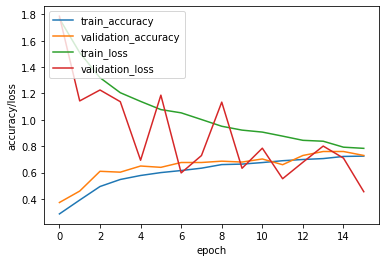

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.legend(['train_accuracy', 'validation_accuracy', 'train_loss', 'validation_loss'], loc='upper left')

In [0]:
result = model.evaluate(test_datagenerator,
                        steps = 30)
print('Final Test Accuracy:', (result[1]*100))

30/30 [==============================] - 2s 63ms/step
Final Test Accuracy: 78.66666913032532


In [0]:
predict = model.predict_generator(test_datagenerator, steps=15)
print(predict.shape)

(300, 6)


In [0]:
y_pred = np.argmax(predict, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_datagenerator.classes, y_pred))


Confusion Matrix
[[ 7 15  7  6  6  9]
 [ 6 11  8  4  7 14]
 [11 13  6  6  8  6]
 [ 3 13 10  9  7  8]
 [ 6 11 11  3  9 10]
 [ 8 12  7  5  8 10]]


In [0]:
print('Classification Report')
target_names = ['Church', 'English_springer', 'garbage_truck', 'gas_pump', 'parachute', 'tench']
print(classification_report(test_datagenerator.classes, y_pred, target_names=target_names))

Classification Report
                  precision    recall  f1-score   support

          Church       0.17      0.14      0.15        50
English_springer       0.15      0.22      0.18        50
   garbage_truck       0.12      0.12      0.12        50
        gas_pump       0.27      0.18      0.22        50
       parachute       0.20      0.18      0.19        50
           tench       0.18      0.20      0.19        50

        accuracy                           0.17       300
       macro avg       0.18      0.17      0.17       300
    weighted avg       0.18      0.17      0.17       300



In [0]:
model.save('/content/gdrive/My Drive/Colab Notebooks/cnn_q1e.h5')
print("Model settings have been saved")

Model settings have been saved
